In [1]:
!pip install pylhe

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.1/171.1 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 KB 20.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
decaylanguage 0.14.1 requires particle==0.20.*, but you have particle 0.23.0 which is incompatible.
decaylanguage 0.14.1 requires plumbum>=1.6.9, but you have plumbum 0.0.0 which is incompatible.


In [18]:
import pylhe
import math
import numpy as np
import pandas as pd

In [28]:
def study_lhe_file(lhe_file_path):
    """
    Analyzes the LHE file and returns DataFrames with the kinematic properties of the particles.

    This function reads events from the provided LHE file, extracts kinematic properties of the particles,
    and differentiates between particles based on their PDG codes. The function then computes additional
    kinematic variables and stores them in separate tables for positive and negative PDG codes.

    Parameters:
    - lhe_file_path (str): Path to the LHE file to be analyzed.

    Returns:
    - tuple: Two pandas DataFrames containing kinematic properties for particles with positive and negative PDG codes, respectively.

    Note:
    The function assumes specific PDG codes (4110000 - Monopole and -4110000 Anti-Monopole) for differentiation. Adjust as needed.
    """
    data_mon = []
    data_ant = []
    
    # Ler eventos do arquivo LHE
    events = pylhe.read_lhe_with_attributes(lhe_file_path)
    for event in events:
        for i, particle in enumerate(event.particles):
            # Aqui, você pode acessar as propriedades cinemáticas da partícula
            px = particle.px
            py = particle.py
            pz = particle.pz
            e = particle.e
            pdg = particle.id
            
            # Calcular variáveis cinemáticas adicionais
            pt = np.sqrt(px**2 + py**2)
            
            # Evitar divisão por zero ao calcular eta
            denominator = (e - pz)
            if denominator != 0:
                eta = np.abs(0.5 * np.log((e + pz) / denominator))
            else:
                eta = np.abs(np.nan)
            
            if np.isinf(eta):
                eta = np.nan
            phi = np.arctan2(py, px)
            theta = np.arctan2(pz, pt)
            
            # Calcular a massa invariante para pares de partículas consecutivas
            m_inv = None
            if i < len(event.particles) - 1:
                next_particle = event.particles[i+1]
                particle1 = (e, px, py, pz)
                particle2 = (next_particle.e, next_particle.px, next_particle.py, next_particle.pz)
            
            # Diferenciar entre os códigos PDG e armazenar em tabelas separadas
            if pdg == 4110000:
                data_mon.append([e, px, py, pz, pt, eta, phi, theta])
            elif pdg == -4110000:
                data_ant.append([e, px, py, pz, pt, eta, phi, theta])
    
    # Criar DataFrames
    df_pos = pd.DataFrame(data_mon, columns=["en", "px", "py", "pz", "pt", "eta", "phi", "theta"])
    df_neg = pd.DataFrame(data_ant, columns=["en", "px", "py", "pz", "pt", "eta", "phi", "theta"])
    
    return df_pos, df_neg


In [36]:
base_path = '/eos/home-m/matheus/magnetic_monopole_output/'
file_patterns = [
    "SpinZero_PF_34_mass_{mass}_events_1000.lhe",
    #"SpinZero_DY_34_mass_{mass}_events_1000.lhe",
    #"SpinHalf_PF_34_mass_{mass}_events_1000.lhe",
    #"SpinHalf_DY_34_mass_{mass}_events_1000.lhe"
]
masses = [800, 1000, 1200, 1400]

results = {}

for mass in masses:
    for pattern in file_patterns:
        file_name = pattern.format(mass=mass)
        lhe_file_path = base_path + file_name
        df_pos, df_neg = study_lhe_file(lhe_file_path)
        
        # Armazenar os resultados no dicionário
        results[file_name] = {"pos": df_pos, "neg": df_neg}

# Exibir os resultados
for file_name, data in results.items():
    print(f"\nDados para {file_name} e PDG 4110000:")
    print(data["pos"].head())
    print(f"\nDados para {file_name} e PDG -4110000:")
    print(data["neg"].head())

/tmp/ipykernel_549/3596704646.py:25: RuntimeWarning: divide by zero encountered in log
  eta = np.abs(0.5 * np.log((e + pz) / denominator))
/tmp/ipykernel_549/3596704646.py:25: RuntimeWarning: divide by zero encountered in log
  eta = np.abs(0.5 * np.log((e + pz) / denominator))
/tmp/ipykernel_549/3596704646.py:25: RuntimeWarning: divide by zero encountered in log
  eta = np.abs(0.5 * np.log((e + pz) / denominator))
/tmp/ipykernel_549/3596704646.py:25: RuntimeWarning: divide by zero encountered in log
  eta = np.abs(0.5 * np.log((e + pz) / denominator))



Dados para SpinZero_PF_34_mass_800_events_1000.lhe e PDG 4110000:
            en          px          py           pz          pt       eta  \
0  1128.335124 -270.141395 -523.734557  -534.664279  589.299804  0.515027   
1  1718.060213 -188.855466 -100.918911 -1505.283987  214.128498  1.358967   
2  1408.118027  327.399155  380.202820 -1044.534339  501.741359  0.954458   
3  1150.958011 -123.202840  363.123248  -733.257738  383.454604  0.753251   
4  1451.437719  265.507598  826.434200   844.502031  868.036734  0.665237   

        phi     theta  
0 -2.047003 -0.736827  
1 -2.650828 -1.429493  
2  0.859884 -1.122992  
3  1.897895 -1.088960  
4  1.259943  0.771656  

Dados para SpinZero_PF_34_mass_800_events_1000.lhe e PDG -4110000:
            en          px          py           pz          pt       eta  \
0  1187.870695  270.141395  523.734557  -650.970452  589.299804  0.615539   
1  1383.751361  188.855466  100.918911 -1108.565206  214.128498  1.101760   
2  1070.875247 -327.399155 

In [42]:
import scipy.constants
import numpy as np
import pandas as pd

def calculate_deltas(df_mono, df_anti):
    """
    Calculates the delta eta, delta phi, acoplanarity, and the absolute value of the cosine of the polar angle θ∗ between the monopole and the antimonopole.

    This function computes various kinematic differences and correlations between the provided monopole and antimonopole DataFrames. It calculates the differences in eta and phi, adjusts the phi difference to the range [-pi, pi], computes the acoplanarity, and calculates the absolute value of the cosine of the polar angle θ∗. Additionally, it computes the invariant mass, transverse momentum, and the opening angle between the two particles.

    Parameters:
    - df_mono (pd.DataFrame): DataFrame containing kinematic properties of the monopole.
    - df_anti (pd.DataFrame): DataFrame containing kinematic properties of the antimonopole.

    Returns:
    - pd.DataFrame: A DataFrame containing the columns 'delta_eta', 'delta_phi', 'acoplanarity', 'abs_cos_theta_star', 'invariant_mass', 'pt_mono_antimono', and 'opening_angle'.

    Note:
    The function assumes specific column names in the input DataFrames. Ensure the input DataFrames have the required columns.
    """
    
    delta_eta = df_mono['eta'] - df_anti['eta']
    delta_phi = df_mono['phi'] - df_anti['phi']
    
    # Ajustar delta_phi para o intervalo [-pi, pi]
    delta_phi = np.where(delta_phi >= scipy.constants.pi, delta_phi - 2 * scipy.constants.pi, delta_phi)
    delta_phi = np.where(delta_phi < -scipy.constants.pi, delta_phi + 2 * scipy.constants.pi, delta_phi)
       
    # Calcular a acoplanaridade
    acoplanarity = 1 - np.abs(delta_phi) / np.pi

    # Calcular o valor absoluto do cosseno do ângulo polar θ∗
    m_mm = np.sqrt((df_mono['en'] + df_anti['en'])**2 - ((df_mono['px'] + df_anti['px'])**2 + (df_mono['py'] + df_anti['py'])**2 + (df_mono['pz'] + df_anti['pz'])**2))
    pt_mm = np.sqrt((df_mono['px'] + df_anti['px'])**2 + (df_mono['py'] + df_anti['py'])**2)
    delta_eta_mm = np.abs(df_mono['eta'] - df_anti['eta'])
    abs_cos_theta_star = np.abs(np.sinh(delta_eta_mm)) / np.sqrt(1 + (pt_mm / m_mm)**2) * (2 * df_mono['pt'] * df_anti['pt']) / m_mm**2
    
    # Calculate the dot product of the momentum vectors
    dot_product = df_mono['px']*df_anti['px'] + df_mono['py']*df_anti['py'] + df_mono['pz']*df_anti['pz']
    # Calculate the magnitudes of the momentum vectors
    mag1 = np.sqrt(df_mono['px']**2 + df_mono['py']**2 + df_mono['pz']**2)
    mag2 = np.sqrt(df_anti['px']**2 + df_anti['py']**2 + df_anti['pz']**2)
    # Calculate the opening angle
    opening_angle = np.arccos(dot_product / (mag1 * mag2))
    
    # Retornar um novo dataframe com as colunas desejadas
    df_deltas = pd.DataFrame({
        'delta_eta': delta_eta_mm, 
        'delta_phi': delta_phi, 
        'acoplanarity': acoplanarity, 
        'abs_cos_theta_star': abs_cos_theta_star,
        'invariant_mass': m_mm,
        'pt_mono_antimono': pt_mm,
        'opening_angle': opening_angle
    })

    return df_deltas


In [43]:
# Usando a função com os DataFrames gerados anteriormente
df_results = calculate_deltas(df_pos, df_neg)
print(df_results.head())

   delta_eta  delta_phi  acoplanarity  abs_cos_theta_star  invariant_mass  \
0   0.283584  -3.141593           0.0            0.012681     2964.809913   
1   1.298900  -3.141593           0.0            0.100601     3758.479081   
2   0.473396  -3.141593           0.0            0.021863     3024.602960   
3   0.187703  -3.141593           0.0            0.001430     2834.081071   
4   0.524096  -3.141593           0.0            0.039502     3551.119739   

   pt_mono_antimono  opening_angle  
0               0.0       1.856555  
1               0.0       1.724475  
2               0.0       0.886896  
3               0.0       0.413360  
4               0.0       2.586557  


In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_comparison_histograms(df1, df2, label1, label2, mass, bins=70):
    """
    Plota histogramas de comparação para as variáveis cinemáticas desejadas.

    :param df1: DataFrame 1
    :param df2: DataFrame 2
    :param label1: Rótulo para o DataFrame 1
    :param label2: Rótulo para o DataFrame 2
    :param mass: Massa para o título do histograma
    :param bins: Número de bins para o histograma
    """
    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(35, 33), gridspec_kw={'height_ratios': [3, 1, 3, 1]})
    
    columns = [
        'acoplanarity', 
        'opening_angle',
        'delta_eta', 
        'abs_cos_theta_star',
        'invariant_mass',
        'pt_mono_antimono'
    ]
    units = [
        '', 
        '',
        '',
        '',
        'GeV',
        'GeV'
    ]
    
    Vars = [
        r'$\Delta \eta$', 
        'Opening Angle', 
        'Acopl',
        r'$|\cos(\theta*)|$', 
        r'$M_{m\bar{m}}$',
        r'$p_{T}^{m\bar{m}}$'
    ]

    for i, column in enumerate(columns):
        # calculate histograms
        hist1, edges = np.histogram(df1[column], bins=bins)
        hist2, edges = np.histogram(df2[column], bins=bins)

        # calculate ratio and its error
        ratio = hist1 / hist2
        ratio_err = np.sqrt((np.sqrt(hist1) / hist2)**2 + (hist1 * np.sqrt(hist2) / hist2**2)**2)

        # plot histograms
        ax[i//3*2, i%3].hist(edges[:-1], bins=bins, weights=hist1, alpha=0.99, label=label1, histtype='step', linewidth=3)
        ax[i//3*2, i%3].hist(edges[:-1], bins=bins, weights=hist2, alpha=0.99, label=label2, histtype='step', linewidth=3)
        ax[i//3*2, i%3].set_title(f'Histogram of {Vars[i]} (Mass - {mass} GeV)')
        
        # calculate statistics
        total1 = df1[column].count()
        media1 = df1[column].mean()
        std1 = df1[column].std()
        total2 = df2[column].count()
        media2 = df2[column].mean()
        std2 = df2[column].std()

        # add statistics box
        stats_text = f'{label1}:\nTotal = {total1}\nMean = {media1:.2f}\nStd = {std1:.2f}\n\n{label2}:\nTotal = {total2}\nMean = {media2:.2f}\nStd = {std2:.2f}'
        ax[i//3*2, i%3].text(0.95, 0.3, stats_text, transform=ax[i//3*2, i%3].transAxes, fontsize=30, verticalalignment='center', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
   
        if i == 0:
            ax[i//3, i%3].set_ylabel('Count', fontsize = 30)
        ax[i//3*2, i%3].xaxis.set_label_coords(0.5, -0.1)
        ax[i//3*2, i%3].legend(fontsize = 25)

    
        # plot ratio
        ax[i//3*2 + 1, i%3].errorbar((edges[1:] + edges[:-1]) / 2, ratio, yerr=ratio_err, fmt='o', color = 'black', label=f'Ratio {label1} / {label2}')
        ax[i//3*2 + 1, i%3].axhline(1, color='gray', linestyle='--', linewidth=3)  # add horizontal line at y=1
        ax[i//3*2 + 1, i%3].set_xlabel(f'{Vars[i]} {f"({units[i]})" if units[i] else ""}', fontsize = 30)
        ax[i//3*2 + 1, i%3].xaxis.set_label_coords(0.5, -0.1)  # move x-axis label to the center
        ax[i//3*2 + 1, i%3].set_ylabel(f'{label1} / {label2}', fontsize = 24)

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_549/3561599403.py:49: RuntimeWarning: invalid value encountered in true_divide
  ratio = hist1 / hist2
/tmp/ipykernel_549/3561599403.py:50: RuntimeWarning: invalid value encountered in true_divide
  ratio_err = np.sqrt((np.sqrt(hist1) / hist2)**2 + (hist1 * np.sqrt(hist2) / hist2**2)**2)
/tmp/ipykernel_549/3561599403.py:49: RuntimeWarning: invalid value encountered in true_divide
  ratio = hist1 / hist2
/tmp/ipykernel_549/3561599403.py:50: RuntimeWarning: invalid value encountered in true_divide
  ratio_err = np.sqrt((np.sqrt(hist1) / hist2)**2 + (hist1 * np.sqrt(hist2) / hist2**2)**2)
/tmp/ipykernel_549/3561599403.py:49: RuntimeWarning: invalid value encountered in true_divide
  ratio = hist1 / hist2
/tmp/ipykernel_549/3561599403.py:50: RuntimeWarning: invalid value encountered in true_divide
  ratio_err = np.sqrt((np.sqrt(hist1) / hist2)**2 + (hist1 * np.sqrt(hist2) / hist2**2)**2)
/tmp/ipykernel_549/3561599403.py:49: RuntimeWarning: invalid value encountered in true_d

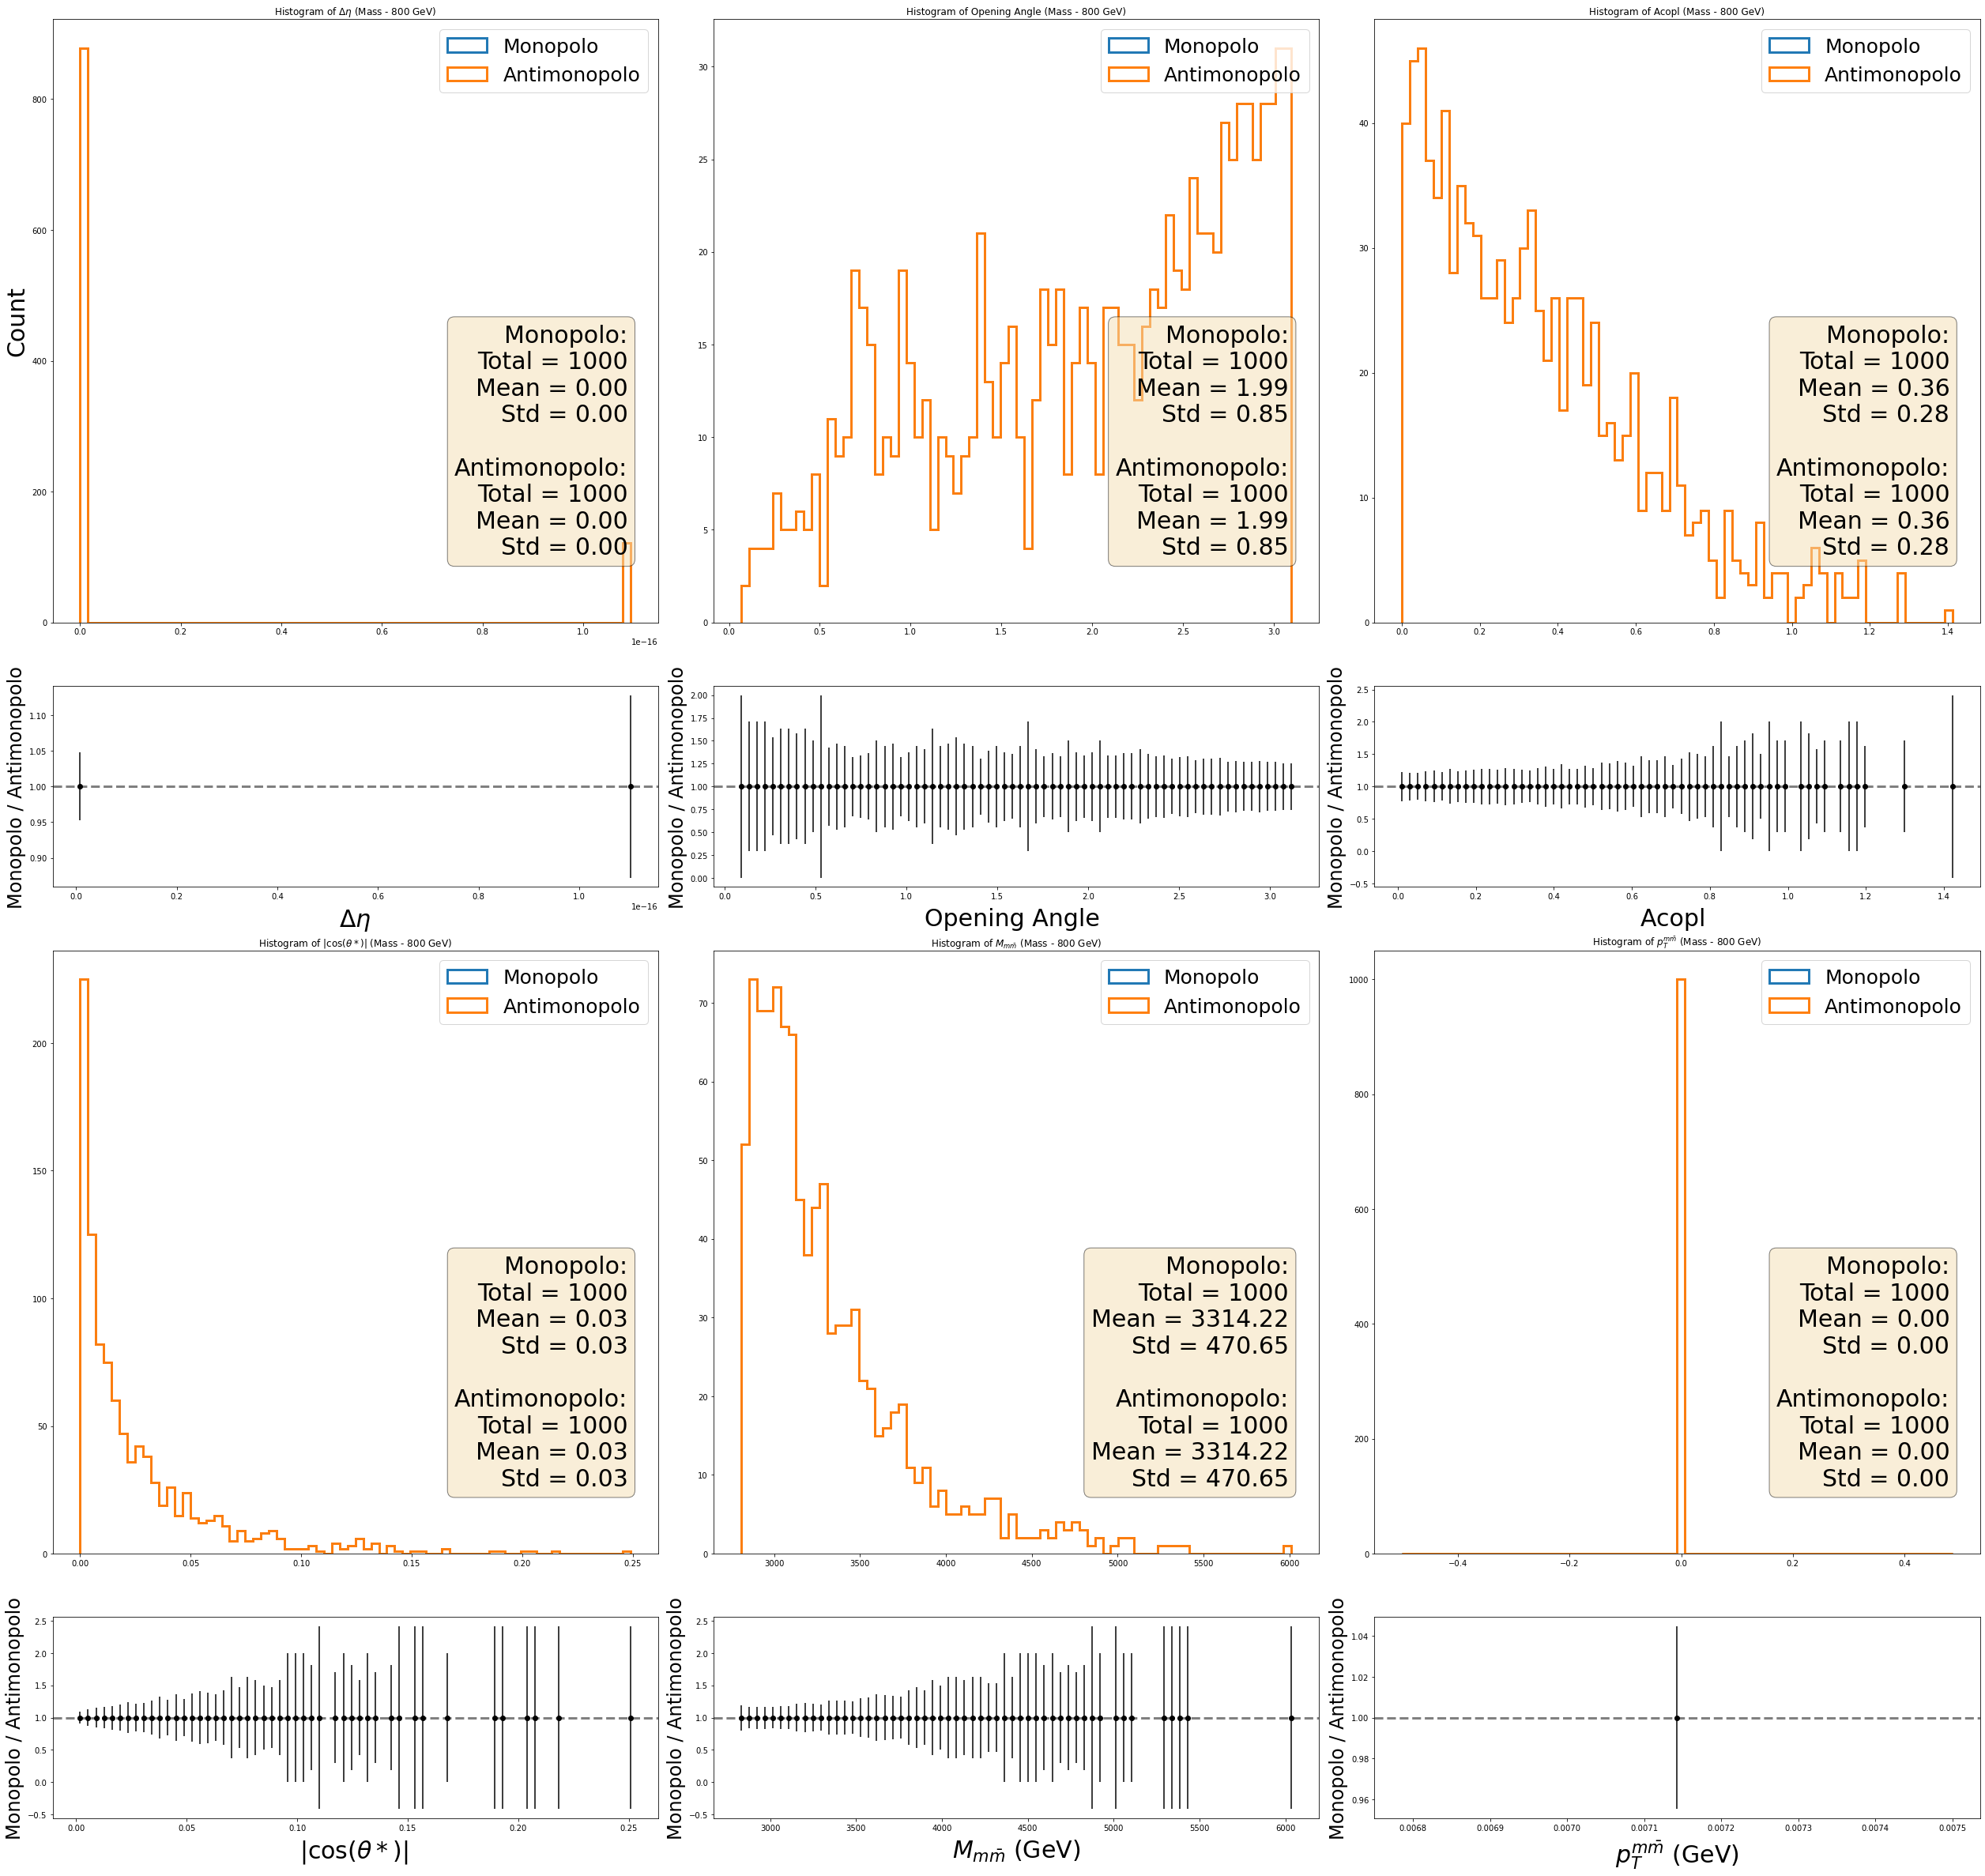

In [46]:
# Suponha que você tenha dois DataFrames df_pos e df_neg que foram gerados anteriormente
df_deltas_pos = calculate_deltas(df_pos, df_neg)
df_deltas_neg = calculate_deltas(df_neg, df_pos)

# Agora, você pode usar esses DataFrames para plotar os histogramas de comparação
plot_comparison_histograms(df_deltas_pos, df_deltas_neg, "Monopolo", "Antimonopolo", "800")

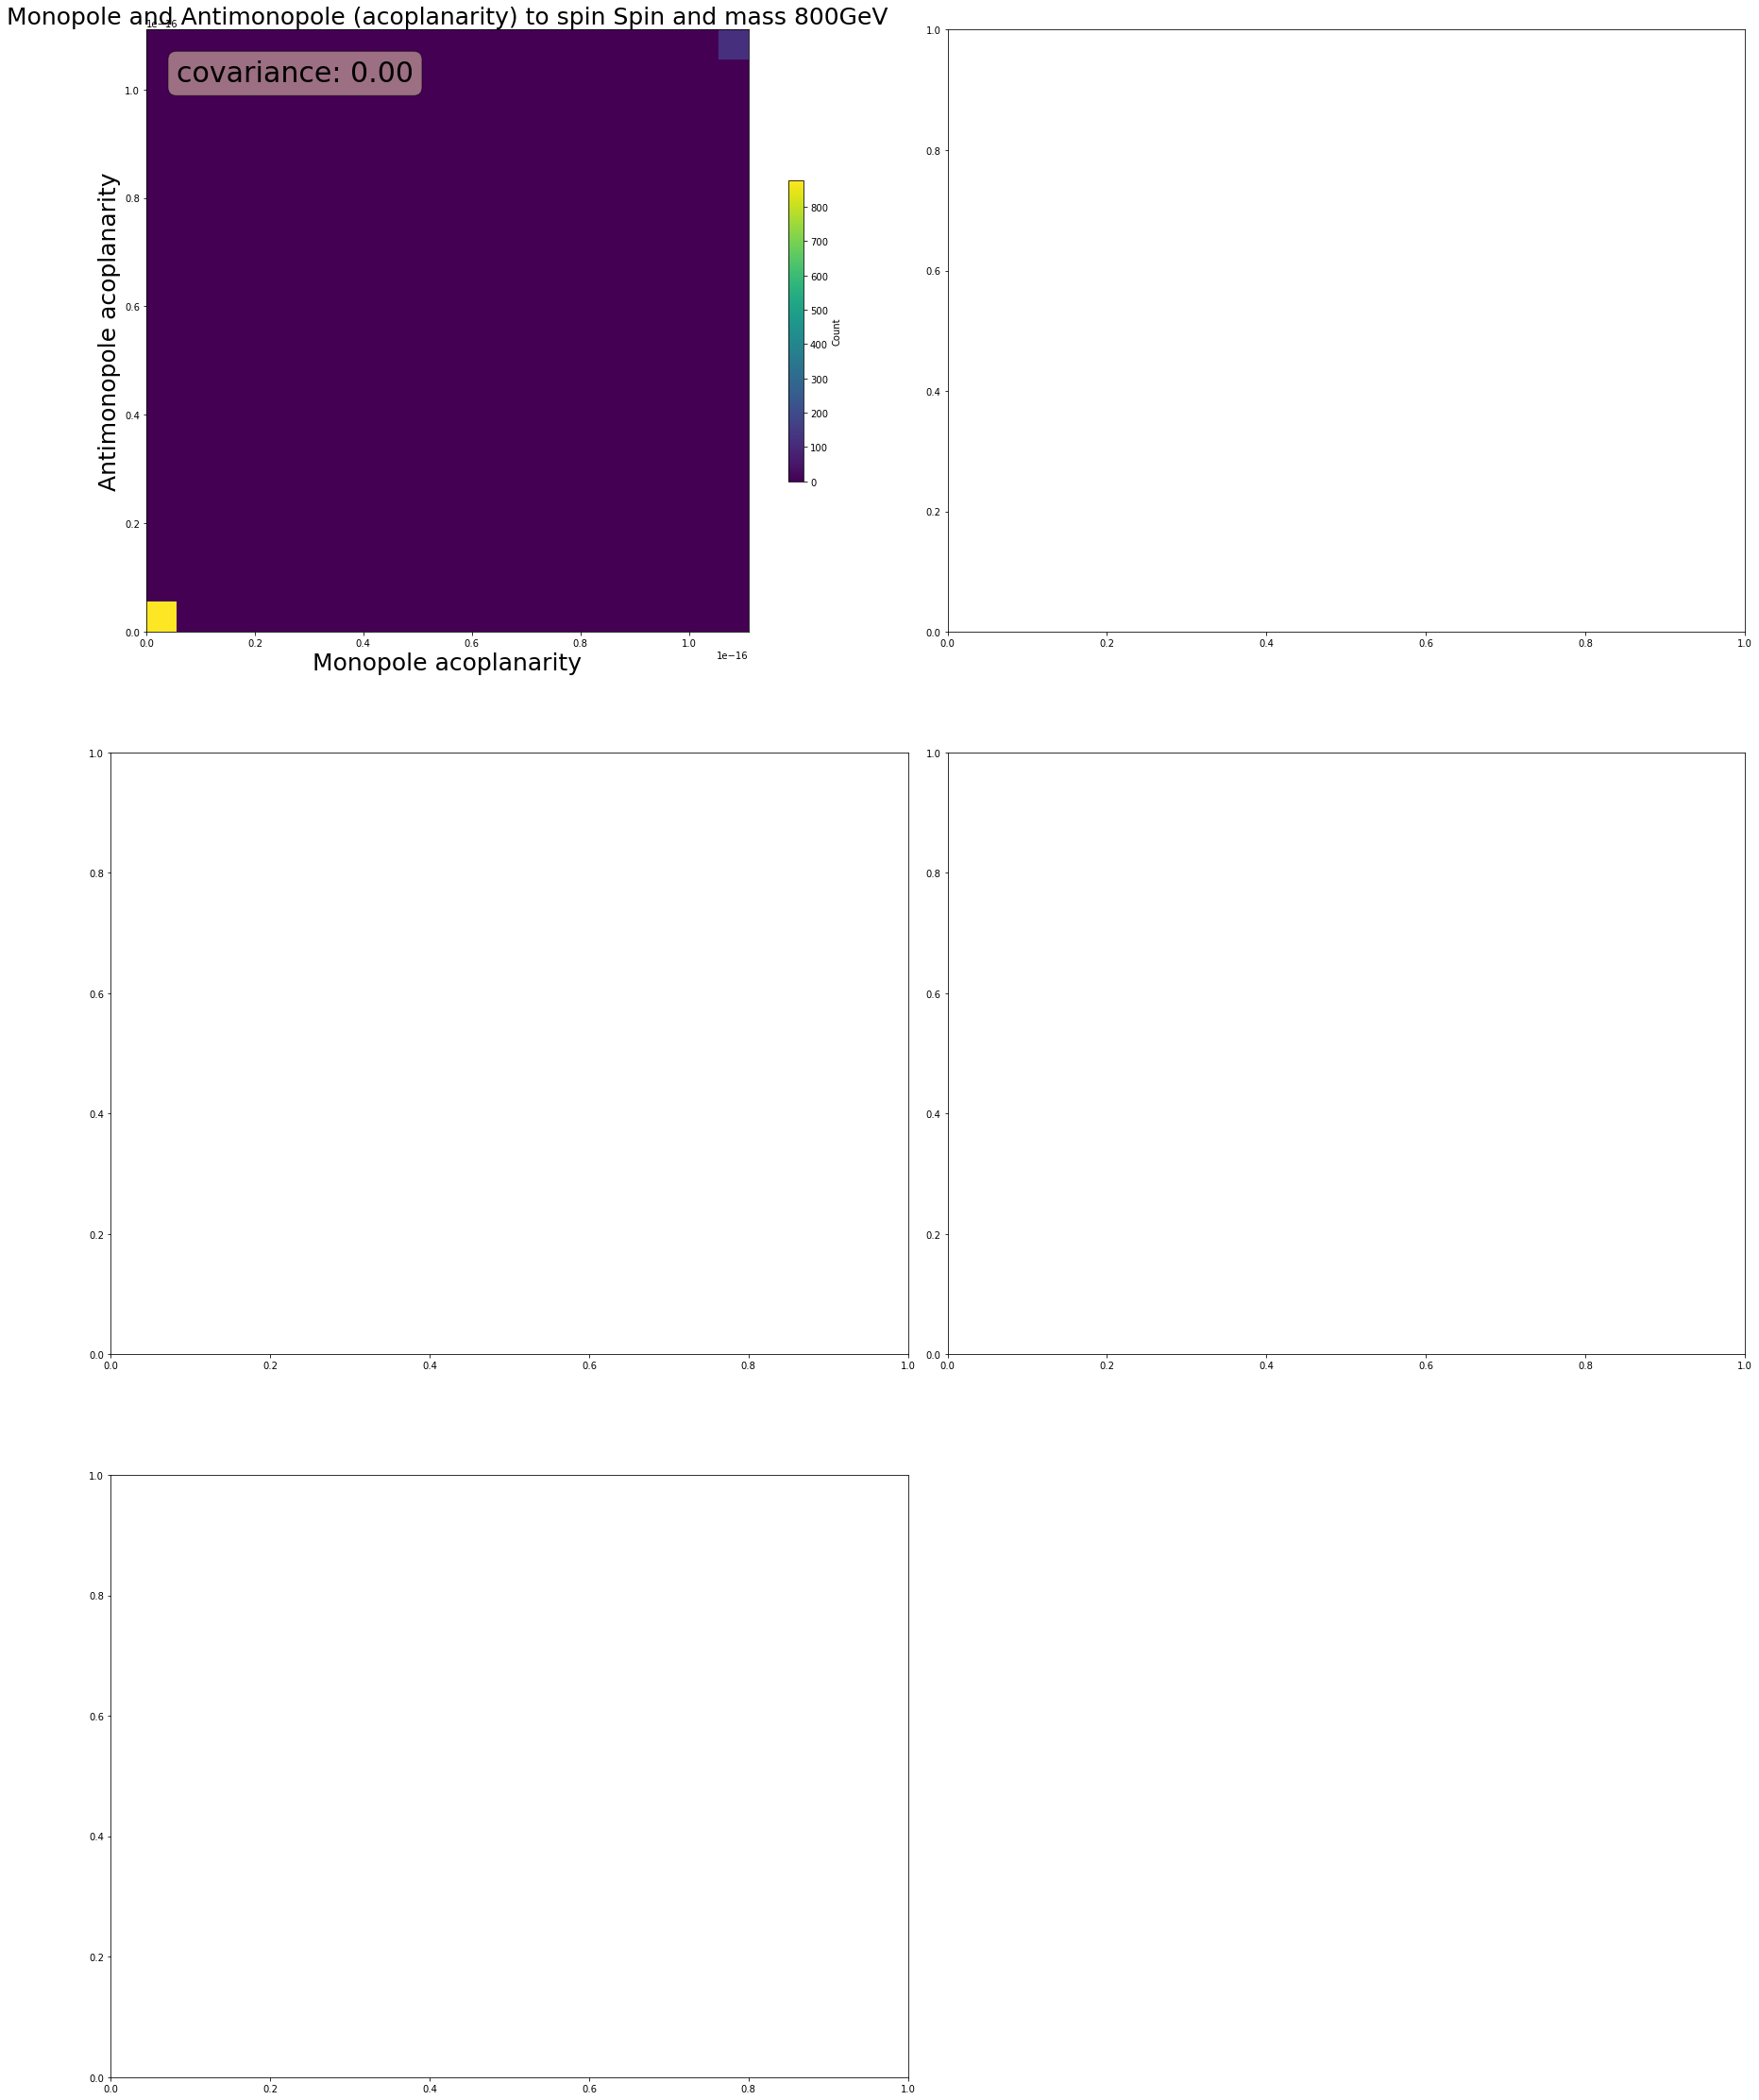

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_correlation_heatmaps(dfs_mono, dfs_anti, vars, spin, mass, bins=20, colorbar_shrink=0.5):
    """
    Plota heatmaps da correlação entre as variáveis para os dataframes do monopolo e antimonopolo.

    :param dfs_mono: Lista de DataFrames do monopolo
    :param dfs_anti: Lista de DataFrames do antimonopolo
    :param vars: Lista de variáveis a serem correlacionadas
    :param spin: A spin a ser indicada
    :param mass: A massa a ser indicada
    :param bins: O número de bins a serem usados no histograma
    :param colorbar_shrink: Quanto a barra de cores deve ser reduzida em tamanho
    """
    fig, axs = plt.subplots(3, 2, figsize=(25, 31))
    axs = axs.flatten()  # flatten the array of axes

    for ax, df_mono, df_anti, var in zip(axs[:-1], dfs_mono, dfs_anti, vars):  # ignore the last ax
        # Obter a variável desejada dos DataFrames
        mono_var = df_mono[var]
        anti_var = df_anti[var]

        # Calcular o histograma 2D
        counts, xedges, yedges = np.histogram2d(mono_var, anti_var, bins=bins)

        # Plotar o heatmap
        img = ax.imshow(counts, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
        fig.colorbar(img, ax=ax, label='Count', shrink=colorbar_shrink)
        ax.set_xlabel('Monopole ' + var, fontsize = 25)
        ax.set_ylabel('Antimonopole ' + var, fontsize = 25)
        ax.set_title(f'Monopole and Antimonopole ({var}) to spin {spin} and mass {mass}GeV',fontsize = 25)
        
        # Calcular a covariancia
        cov = np.cov(mono_var, anti_var)[0, 1]
        
        # Adicionar a caixa de texto
        ax.text(0.05, 0.95, 'covariance: {:.2f}'.format(cov), transform=ax.transAxes, fontsize=30,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Remove the unused subplot
    fig.delaxes(axs[-1])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.show()

# Suponha que você tenha dois DataFrames df_pos e df_neg que foram gerados anteriormente
df_deltas_pos = calculate_deltas(df_pos, df_neg)
df_deltas_neg = calculate_deltas(df_neg, df_pos)

# Agora, você pode usar esses DataFrames para plotar os heatmaps de correlação
plot_correlation_heatmaps([df_deltas_pos], [df_deltas_neg], ['acoplanarity', 'opening_angle', 'delta_eta', 'abs_cos_theta_star', 'invariant_mass', 'pt_mono_antimono'], "Spin", "800")